In [1]:
print("hello world")
date = '2017-08-01'
! aws s3 sync s3://deutsche-boerse-eurex-pds/{date} pds/{date} --no-sign-request
! dir "pds/2017-08-01"        

hello world
 Volume in drive D is DATA
 Volume Serial Number is 5C53-8A75

 Directory of D:\UIUC\CloudComputing\Milestone2\pds\2017-08-01

03/30/2019  02:46 PM    <DIR>          .
03/30/2019  02:46 PM    <DIR>          ..
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR00.csv
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR01.csv
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR02.csv
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR03.csv
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR04.csv
04/05/2018  10:08 AM               230 2017-08-01_BINS_XEUR05.csv
04/05/2018  10:08 AM            64,410 2017-08-01_BINS_XEUR06.csv
04/05/2018  10:08 AM           216,666 2017-08-01_BINS_XEUR07.csv
04/05/2018  10:08 AM           211,584 2017-08-01_BINS_XEUR08.csv
04/05/2018  10:08 AM           346,920 2017-08-01_BINS_XEUR09.csv
04/05/2018  10:08 AM           309,905 2017-08-01_BINS_XEUR10.csv
04/05/2018  10:08 AM           240,410 2017-08-01_BI

In [2]:
import pandas as pd
import numpy as np
import glob, os
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns
sns.set(color_codes=True)

In [3]:
def load_csv_dir(data_dir):
    return pd.concat(map(pd.read_csv, glob.glob(os.path.join(data_dir, '*.csv'))))

data_dir = 'pds/%s/' % date
print("Loading from {}".format(data_dir))
unprocessed_df = load_csv_dir(data_dir)
unprocessed_df.head()


Loading from pds/2017-08-01/


,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades
0,DE000C0JK5K6,FDAX,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,NaN,2163021,2017-08-01,06:00,12128.50,12129.00,12119.50,12124.00,381,266
1,DE000C0JK5P5,FDXM,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,NaN,2163025,2017-08-01,06:00,12125.00,12130.00,12120.00,12126.00,45,31
2,DE000C0JK6C1,FESX,SX5E,EU0009658145,EUR,FUT,20170915.0,NaN,NaN,NaN,NaN,2163048,2017-08-01,06:00,3452.00,3455.00,3450.00,3454.00,2828,236
3,DE000C0HRXN0,FBTP,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,NaN,2150976,2017-08-01,06:01,136.32,136.33,136.26,136.27,67,56
4,DE000C0HRXQ3,FGBL,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,NaN,2150978,2017-08-01,06:01,161.87,161.93,161.87,161.90,1113,152


In [55]:
# Introduce a new column called CalcDateTime that is a timestamp calculated from the date and time string columns
# Maturity date is currently represented as a float, change that to proper datetime
import math

def convert_dt(date, time):
    return datetime.strptime(date + ' ' + time, '%Y-%m-%d %H:%M')

# Lets convert to date time so we can use it for analysis
def convert_maturity_date(date):
    if math.isnan(date):
        return None
    year = (int)(date/10000)
    remainder = (int)(date%10000)
    month = (int)(remainder/100)
    day = (int)(remainder%100)
    return datetime.strptime(str(year)+'-'+str(month)+'-'+str(day), '%Y-%m-%d')

unprocessed_df["CalcMaturityDate"] = unprocessed_df.apply(lambda row: convert_maturity_date(row['MaturityDate']), axis=1)
unprocessed_df["CalcDateTime"] = unprocessed_df.apply(lambda row: convert_dt(row['Date'], row['Time']), axis=1)
unprocessed_df.head()

,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,...,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades,CalcTime,CalcDateTime,CalcMaturityDate
0,DE000C0JK5K6,FDAX,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,12128.50,12129.00,12119.50,12124.00,381,266,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
1,DE000C0JK5P5,FDXM,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,12125.00,12130.00,12120.00,12126.00,45,31,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
2,DE000C0JK6C1,FESX,SX5E,EU0009658145,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,3452.00,3455.00,3450.00,3454.00,2828,236,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
3,DE000C0HRXN0,FBTP,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,...,06:01,136.32,136.33,136.26,136.27,67,56,1900-01-01 06:01:00,2017-08-01 06:01:00,2017-09-07
4,DE000C0HRXQ3,FGBL,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,...,06:01,161.87,161.93,161.87,161.90,1113,152,1900-01-01 06:01:00,2017-08-01 06:01:00,2017-09-07


In [57]:
unprocessed_df.groupby('Currency').count()
# EUR seems to be the majority contributor to the dataset

,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,...,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades,CalcTime,CalcDateTime,CalcMaturityDate
Currency,,,,,,,,,,,,,,,,,,,,,
EUR,18976,18976,14328,14328,18976,18524,6739,6739,452,6739,...,18976,18976,18976,18976,18976,18976,18976,18976,18976,18524
GBX,2,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2
KRW,5173,5173,5173,5173,5173,5173,5061,5061,0,5061,...,5173,5173,5173,5173,5173,5173,5173,5173,5173,5173
TWD,8,8,8,8,8,8,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
USD,91,91,91,91,91,91,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91


In [58]:
unprocessed_df.groupby(['SecurityType', 'Currency']).count()
# Here, we see EUR currency and FUT security type are the major contributors, but EUR OPT are comparable,
# so lets not filter past currency

ISIN  MarketSegment  UnderlyingSymbol  UnderlyingISIN  \
SecurityType Currency                                                           
FUT          EUR       11785          11785              7263            7263   
             KRW         112            112               112             112   
             TWD           8              8                 8               8   
             USD          91             91                91              91   
MLEG         EUR         452            452               326             326   
OPT          EUR        6739           6739              6739            6739   
             GBX           2              2                 2               2   
             KRW        5061           5061              5061            5061   

                       MaturityDate  StrikePrice  PutOrCall  MLEG  \
SecurityType Currency                                               
FUT          EUR              11785            0          0     0   
             KRW                112            0          0     0   
             TWD                  8            0          0     0   
             USD                 91            0          0     0   
MLEG         EUR                  0            0          0   452   
OPT          EUR               6739         6739       6739     0   
             GBX                  2            2          2     0   
             KRW               5061         5061       5061     0   

                       ContractGenerationNumber  SecurityID        ...         \
SecurityType Currency                                              ...          
FUT          EUR                              0       11785        ...          
             KRW                              0         112        ...          
             TWD                              0           8        ...          
             USD                              0          91        ...          
MLEG         EUR                              0         452        ...          
OPT          EUR                           6739        6739        ...          
             GBX                              2           2        ...          
             KRW                           5061        5061        ...          

                        Time  StartPrice  MaxPrice  MinPrice  EndPrice  \
SecurityType Currency                                                    
FUT          EUR       11785       11785     11785     11785     11785   
             KRW         112         112       112       112       112   
             TWD           8           8         8         8         8   
             USD          91          91        91        91        91   
MLEG         EUR         452         452       452       452       452   
OPT          EUR        6739        6739      6739      6739      6739   
             GBX           2           2         2         2         2   
             KRW        5061        5061      5061      5061      5061   

                       NumberOfContracts  NumberOfTrades  CalcTime  \
SecurityType Currency                                                
FUT          EUR                   11785           11785     11785   
             KRW                     112             112       112   
             TWD                       8               8         8   
             USD                      91              91        91   
MLEG         EUR                     452             452       452   
OPT          EUR                    6739            6739      6739   
             GBX                       2               2         2   
             KRW                    5061            5061      5061   

                       CalcDateTime  CalcMaturityDate  
SecurityType Currency                                  
FUT          EUR              11785             11785  
             KRW                112               112  
             TWD                  8          

In [59]:
# Pick out rows with currency EUR
only_eur_df = unprocessed_df[unprocessed_df.Currency == 'EUR']
print("EUR stocks: %d" % only_eur_df.count()[0])

EUR stocks: 18976


In [65]:
only_eur_df.head()

,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,...,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades,CalcTime,CalcDateTime,CalcMaturityDate
0,DE000C0JK5K6,FDAX,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,12128.50,12129.00,12119.50,12124.00,381,266,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
1,DE000C0JK5P5,FDXM,DAX,DE0008469008,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,12125.00,12130.00,12120.00,12126.00,45,31,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
2,DE000C0JK6C1,FESX,SX5E,EU0009658145,EUR,FUT,20170915.0,NaN,NaN,NaN,...,06:00,3452.00,3455.00,3450.00,3454.00,2828,236,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15
3,DE000C0HRXN0,FBTP,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,...,06:01,136.32,136.33,136.26,136.27,67,56,1900-01-01 06:01:00,2017-08-01 06:01:00,2017-09-07
4,DE000C0HRXQ3,FGBL,NaN,NaN,EUR,FUT,20170907.0,NaN,NaN,NaN,...,06:01,161.87,161.93,161.87,161.90,1113,152,1900-01-01 06:01:00,2017-08-01 06:01:00,2017-09-07


CalcDateTime    11785
StartPrice      11785
dtype: int64


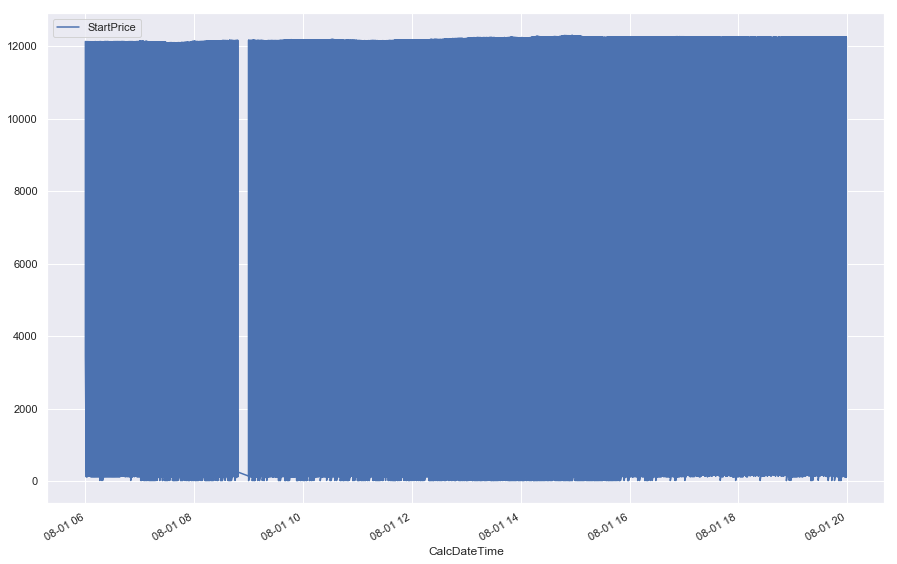

In [71]:
mpl.rcParams['figure.figsize'] = (15, 10)
def plotMetricsForSecurityTypes(df, types=[], metrics=[], time_col="CalcDateTime"):
    ax = None
    for sec_type in types:
        for metric in metrics:
            data_points = df[df.SecurityType == sec_type][['CalcDateTime', metric]].copy()
            print(data_points.count())
            data_points = data_points[data_points[metric] < 15000]
            data_points.index = data_points['CalcDateTime']
            del data_points['CalcDateTime']
            ax = data_points.plot(ax = ax)

plotMetricsForSecurityTypes(only_eur_df, ['FUT'], ['StartPrice'])


In [73]:
only_eur_df.to_csv(index=False)

'ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades,CalcTime,CalcDateTime,CalcMaturityDate\nDE000C0JK5K6,FDAX,DAX,DE0008469008,EUR,FUT,20170915.0,,,,,2163021,2017-08-01,06:00,12128.5,12129.0,12119.5,12124.0,381,266,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15 00:00:00\nDE000C0JK5P5,FDXM,DAX,DE0008469008,EUR,FUT,20170915.0,,,,,2163025,2017-08-01,06:00,12125.0,12130.0,12120.0,12126.0,45,31,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15 00:00:00\nDE000C0JK6C1,FESX,SX5E,EU0009658145,EUR,FUT,20170915.0,,,,,2163048,2017-08-01,06:00,3452.0,3455.0,3450.0,3454.0,2828,236,1900-01-01 06:00:00,2017-08-01 06:00:00,2017-09-15 00:00:00\nDE000C0HRXN0,FBTP,,,EUR,FUT,20170907.0,,,,,2150976,2017-08-01,06:01,136.32,136.33,136.26,136.27,67,56,1900-01-01 06:01:00,2017-08-01 06:01:00,2017-09-07 00:00:00\nDE000C0HRXQ3,FGBL,